# 更多关于线性回归模型的讨论

In [4]:
import numpy as np
from sklearn import datasets

In [5]:
boston = datasets.load_boston()


In [6]:
X = boston.data

In [7]:
y = boston.target

In [8]:
X = X[y<50.0]
y = y[y<50.0]

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [10]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lin_reg.intercept_

32.261106875317907

In [12]:
lin_reg.coef_

array([ -1.05574295e-01,   3.52748549e-02,  -4.35179251e-02,
         4.55405227e-01,  -1.24268073e+01,   3.75411229e+00,
        -2.36116881e-02,  -1.21088069e+00,   2.50740082e-01,
        -1.37702943e-02,  -8.38888137e-01,   7.93577159e-03,
        -3.50952134e-01])

In [ ]:
#进行数据分析     每一个特征的系数   可以解读为 正  负 代表的相关度
# 如果为正  那么就是正相关，系数越大，房价越高

In [13]:
#对系数进行排序

np.argsort(lin_reg.coef_)
#默认从小到大排列      负相关度较大    正相关度较大

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  8,  3,  5], dtype=int64)

In [14]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [16]:
# 排序后的索引
boston.feature_names[np.argsort(lin_reg.coef_)]
#RM   房间数量
#CHAS 房子邻河   

#NO 浓度
#DIS  距离五个波士顿的劳务雇佣中心的距离

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'],
      dtype='<U7')

In [19]:
print(boston.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [25]:
datasets.load_boston().keys()

dict_keys(['feature_names', 'DESCR', 'data', 'target'])

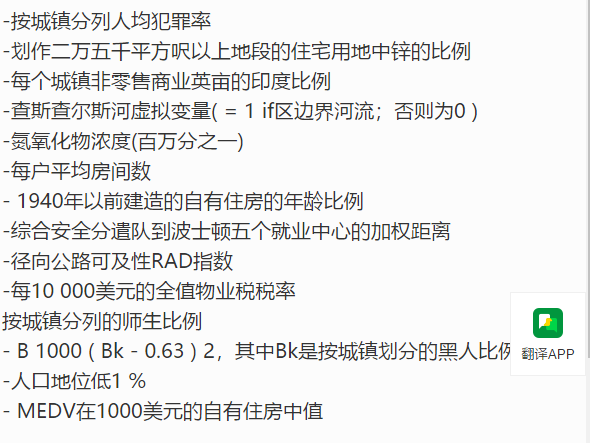

In [ ]:
#但我们获得了可解释性后，可以更好的描述房价
#很大程度房屋的数量决定房间的大小

#NOX  浓度和房价成负相关 可以查看附近是否有化工厂   来进一步判断房价
#这样  我们即使线性回归的相关度不够好，但是我们依然可以通过这个方法来进一步判断出我们房屋的可解释性

In [29]:
 a = np.mean(X)

In [30]:
b = np.mean(y)

In [32]:
( y-b).dot(X - a)

array([ -1.50014556e+04,   3.55502245e+04,  -1.57415153e+04,
         6.79583673e+01,  -2.35371859e+02,   1.72488770e+03,
        -5.33952900e+04,   2.99296992e+03,  -1.59215514e+04,
        -3.70026836e+05,  -4.20990200e+03,   1.30017877e+05,
        -2.07001358e+04])

In [35]:
(X-a).shape

(490, 13)

In [39]:
c = (X-a).reshape(13,490)

In [42]:
np.sqrt((X-a).dot(c)*(y-b).reshape(490,1).dot((y-b).reshape(1,490)))

d:\python\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[           nan,            nan,            nan, ...,
          818.0258398 ,            nan,            nan],
       [   50.94503618,    15.81787443,   130.78089389, ...,
                   nan,    12.523095  ,   122.48629866],
       [           nan,            nan,            nan, ...,
         1682.35870421,            nan,            nan],
       ..., 
       [           nan,            nan,            nan, ...,
          762.58338272,            nan,            nan],
       [           nan,            nan,            nan, ...,
          306.21893875,            nan,            nan],
       [  883.65517956,   258.90975488,  2231.05754621, ...,
                   nan,   220.04741351,  2230.76579027]])

In [43]:
(( y-b).dot(X - a))/(np.sqrt((X-a).dot(c)*(y-b).reshape(490,1).dot((y-b).reshape(1,490))))

d:\python\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


ValueError: operands could not be broadcast together with shapes (13,) (490,490) 